<a href="https://colab.research.google.com/github/jorge-flores-py/APRENDIZAJE-AUTOMATICO-1-IAAA1/blob/main/TP4_AA1_regresion_Lineal_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 AA1

**Jorge Flores**

## Indicaciones b√°sicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compa√±ero.

4) copias expl√≠citas de secciones enteras del trabajo de otro ser√° penalizado disminuyendo su puntuaci√≥n.

5) No se olvide de a√±adir las fuentes de inspiraci√≥n de su c√≥digo (blogs, prompts de chatgpt o similar).

6) Adem√°s de todo el c√≥digo que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada secci√≥n. Esto le ayudar√° al momento del coloquio / parcial

7) Revise las fecha l√≠mite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien m√°s en el foro.
  - Puede comentar m√°s de un posteo de sus compa√±eros siempre y cuando el intercambio sea respetuoso y fruct√≠fero.
* Deben postear como soluci√≥n un enlace a su notebook colab p√∫blico y tambi√©n un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su soluci√≥n y explique lo realizado. Duraci√≥n m√°xima: 5 minutos. Puede grabarse a Ud. mismo usando una sesi√≥n de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces err√≥neos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicaci√≥n de Regresi√≥n Lineal y An√°lisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresi√≥n lineal a un dataset de su elecci√≥n, evaluar su rendimiento e identificar las variables m√°s relevantes para la predicci√≥n.

---

# **Instrucciones**:

#1. **Selecci√≥n del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables num√©ricas continuas (1 target, 3 o m√°s features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligi√≥. Continue al siguiente punto.  



## Resoluci√≥n:

In [ ]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files

# Subir archivo manualmente
uploaded = files.upload()

# Leer archivo
df = pd.read_excel('Folds5x2_pp.xlsx')

# Mostrar primeras filas
df.head()

Saving Folds5x2_pp.xlsx to Folds5x2_pp.xlsx


AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

In [ ]:
#cambiamos los nombres de las columnas
df.rename(columns={
    'AT': 'Temperatura_Ambiente',
    'V': 'Vacio_Escape',
    'AP': 'Presion_Atmosferica',
    'RH': 'Humedad_Relativa',
    'PE': 'Potencia_Electrica'
}, inplace=True)

# Verificar cambio
df.head()

Temperatura_Ambiente  Vacio_Escape  Presion_Atmosferica  Humedad_Relativa  \
0                 14.96         41.76              1024.07             73.17   
1                 25.18         62.96              1020.04             59.08   
2                  5.11         39.40              1012.16             92.14   
3                 20.86         57.32              1010.24             76.64   
4                 10.82         37.50              1009.23             96.62   

   Potencia_Electrica  
0              463.26  
1              444.37  
2              488.56  
3              446.48  
4              473.90


## 2. **An√°lisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribuci√≥n, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gr√°ficos de dispersi√≥n (scatterplots) entre features y target.  
   - **Pregunta clave**: ¬øQu√© relaciones lineales preliminares observan?  


## Resoluci√≥n:

In [ ]:
df.info() #vemos el datalle del dataset columnas, tipo y si hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperatura_Ambiente  9568 non-null   float64
 1   Vacio_Escape          9568 non-null   float64
 2   Presion_Atmosferica   9568 non-null   float64
 3   Humedad_Relativa      9568 non-null   float64
 4   Potencia_Electrica    9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.describe()

Temperatura_Ambiente  Vacio_Escape  Presion_Atmosferica  \
count           9568.000000   9568.000000          9568.000000   
mean              19.651231     54.305804          1013.259078   
std                7.452473     12.707893             5.938784   
min                1.810000     25.360000           992.890000   
25%               13.510000     41.740000          1009.100000   
50%               20.345000     52.080000          1012.940000   
75%               25.720000     66.540000          1017.260000   
max               37.110000     81.560000          1033.300000   

       Humedad_Relativa  Potencia_Electrica  
count       9568.000000         9568.000000  
mean          73.308978          454.365009  
std           14.600269           17.066995  
min           25.560000          420.260000  
25%           63.327500          439.750000  
50%           74.975000          451.550000  
75%           84.830000          468.430000  
max          100.160000          495.760000

In [ ]:
df.shape

(9568, 5)

## üéØ Definici√≥n de Variable Objetivo y Predictoras

### üß≠ Objetivo general del proyecto

El objetivo es construir un modelo de regresi√≥n que permita **predecir la potencia el√©ctrica generada** por una planta de energ√≠a combinada, utilizando variables atmosf√©ricas y de operaci√≥n como entrada. Esta predicci√≥n puede ser √∫til para la planificaci√≥n operativa y la eficiencia energ√©tica.

---

### üìå Variable objetivo (*Target*)

- **Potencia El√©ctrica (PE)**  
  Representa la salida generada por la planta (en megavatios - MW).  
  Se elige como variable objetivo porque es el **resultado final que se desea predecir** a partir de las condiciones del entorno y funcionamiento de la planta.  

---

### üì• Variables predictoras (*Features*)

Se seleccionan como variables de entrada al modelo las siguientes:

1. **Temperatura Ambiente (AT)**  
   - Variable clim√°tica que afecta directamente la eficiencia t√©rmica de la planta.

2. **Vac√≠o de Escape (V)**  
   - Representa el nivel de presi√≥n en el sistema de escape; influye en el rendimiento del ciclo de vapor.

3. **Presi√≥n Atmosf√©rica (AP)**  
   - Afecta la densidad del aire y, por lo tanto, la combusti√≥n y el rendimiento.

4. **Humedad Relativa (RH)**  
   - Puede impactar el proceso de enfriamiento y la eficiencia en la transferencia de calor.

Estas variables se eligen porque son **medibles en tiempo real** y est√°n relacionadas con el entorno operativo de la planta.

---




In [ ]:
from scipy.stats import gaussian_kde
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Category10
from bokeh.models import Span

output_notebook()

# Lista para guardar los gr√°ficos
plots = []
palette = Category10[10]

# Creamos un gr√°fico para cada variable num√©rica
for i, column in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[column]):
        data = df[column].dropna()

        hist, edges = np.histogram(data, bins=20, density=True)
        kde = gaussian_kde(data)
        x_vals = np.linspace(data.min(), data.max(), 200)
        kde_vals = kde(x_vals)

        p = figure(title=f"Distribuci√≥n de {column}", width=300, height=300)
        p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
               fill_color=palette[i % len(palette)], line_color="black", alpha=0.7, legend_label="Histograma")

        p.line(x_vals, kde_vals, line_color="navy", line_width=2, legend_label="KDE")

        # Media
        mean = data.mean()
        mean_line = Span(location=mean, dimension='height', line_color='red', line_dash='dashed', line_width=2)
        p.add_layout(mean_line)

        # Mediana
        median = data.median()
        median_line = Span(location=median, dimension='height', line_color='green', line_dash='solid', line_width=2)
        p.add_layout(median_line)

        p.legend.visible = False
        plots.append(p)

# Mostramos los gr√°ficos en un grid de 4 columnas
grid = gridplot(plots, ncols=5)
show(grid)


### üìà An√°lisis de distribuciones por variable (Histograma + KDE + Media/Mediana)

Se generaron gr√°ficos individuales por variable num√©rica, combinando histogramas normalizados, curvas de densidad KDE, y l√≠neas de referencia para la media (verde) y la mediana (roja). A continuaci√≥n, se detalla el an√°lisis por variable:

---

#### üîπ **Temperatura Ambiente (AT)**
- La **distribuci√≥n es aproximadamente normal**, con una curva KDE sim√©trica.
- **Media y mediana muy cercanas**, lo que indica baja asimetr√≠a.
- No se observan outliers importantes ni multimodalidad.

---

#### üîπ **Vac√≠o de Escape (V)**
- Distribuci√≥n m√°s **extendida y dispersa**, con menor concentraci√≥n de valores centrales.
- La **curva KDE es m√°s plana** y presenta una ligera asimetr√≠a.
- Media y mediana est√°n **levemente separadas**, lo que indica cierto sesgo.


---

#### üîπ **Presi√≥n Atmosf√©rica (AP)**
- Presenta una **distribuci√≥n aproximadamente normal y sim√©trica**.
- **Media y mediana est√°n pr√°cticamente alineadas**, lo que indica ausencia de sesgo.
---

#### üîπ **Humedad Relativa (RH)**
- Distribuci√≥n **m√°s plana y dispersa**, con valores elevados predominantes.
- Hay una **separaci√≥n visible entre media y mediana**, lo que indica asimetr√≠a.
- La curva KDE sugiere **posible multimodalidad o comportamiento no lineal**.
---

#### üîπ **Potencia El√©ctrica (PE)**
- Variable objetivo (*target*), con distribuci√≥n **relativamente sim√©trica y suave**.
- Media y mediana bien alineadas, lo que indica baja asimetr√≠a..


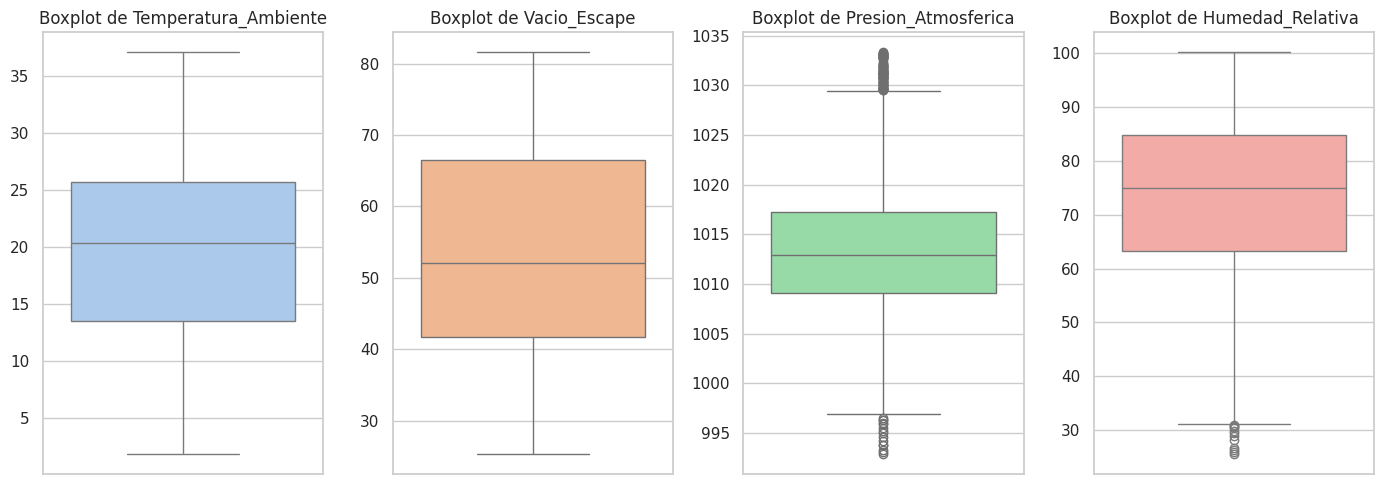

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual
sns.set(style="whitegrid")

# Crear figura con subplots
plt.figure(figsize=(14, 5))

# Boxplots para cada variable predictora
for i, columna in enumerate(df.columns[:-1], 1):  # Excluimos el target
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[columna], color=sns.color_palette("pastel")[i-1])
    plt.title(f'Boxplot de {columna}')
    plt.ylabel('')

plt.tight_layout()
plt.show()


### üì¶ An√°lisis de Dispersi√≥n y Outliers (Boxplots)

Se utilizaron boxplots para visualizar la dispersi√≥n de las variables predictoras y detectar la presencia de valores at√≠picos:
---

#### üîπ Temperatura Ambiente (AT)
- La distribuci√≥n es sim√©trica y bien centrada.
- No se observan outliers significativos.

#### üîπ Vac√≠o de Escape (V)
- No presenta outliers visibles.
- Sin embargo, la **mediana est√° descentrada hacia la parte inferior del rango intercuart√≠lico**, y la parte superior de la caja es m√°s larga.
- Esto sugiere una **asimetr√≠a positiva leve**, es decir, mayor dispersi√≥n en los valores altos.

#### üîπ Presi√≥n Atmosf√©rica (AP)
- Presenta una distribuci√≥n centrada, con la **mediana equilibrada** dentro del rango intercuart√≠lico.
- Se identifican m√∫ltiples **outliers en ambos extremos**, m√°s visibles en el l√≠mite superior.
- La dispersi√≥n en los extremos sugiere **variabilidad ocasional en condiciones atmosf√©ricas**.


#### üîπ Humedad Relativa (RH)
- Presenta una **asimetr√≠a leve negativa**, con mayor dispersi√≥n en los valores bajos.
- La **mediana est√° desplazada hacia valores altos**, indicando que la mayor√≠a de los datos tienen alta humedad.
- Se observan **outliers √∫nicamente en el extremo inferior**, por debajo de aproximadamente 35%.




In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import row
from bokeh.palettes import Category10

output_notebook()

# Crear scatterplots con Bokeh actualizado
colors = Category10[4]
scatter_plots = []

for i, columna in enumerate(df.columns[:-1]):  # Excluye el target
    p = figure(title=f"{columna} vs Potencia_Electrica",
               background_fill_color="#fafafa",
               height=400, width=450)

    p.scatter(x=df[columna], y=df['Potencia_Electrica'], size=4, alpha=0.5, color=colors[i])
    p.xaxis.axis_label = columna
    p.yaxis.axis_label = "Potencia_Electrica"

    scatter_plots.append(p)

# Mostrar los gr√°ficos alineados
show(row(*scatter_plots))


### üîç An√°lisis de relaciones lineales preliminares (scatterplots)

Se realizaron gr√°ficos de dispersi√≥n entre cada variable independiente (*feature*) y la variable dependiente **Potencia El√©ctrica** para identificar relaciones lineales:

- **Temperatura Ambiente vs Potencia El√©ctrica**  
  Se observa una **fuerte relaci√≥n negativa lineal**. A medida que aumenta la temperatura ambiente, la potencia el√©ctrica generada disminuye. Esto indica una dependencia directa y significativa.

- **Vac√≠o de Escape vs Potencia El√©ctrica**  
  Existe una **relaci√≥n negativa d√©bil pero visible**. Aunque no tan marcada como con la temperatura, los datos muestran una leve tendencia a que, con mayor vac√≠o, disminuye la potencia.

- **Presi√≥n Atmosf√©rica vs Potencia El√©ctrica**  
  Se detecta una **relaci√≥n levemente positiva**, aunque con **alta dispersi√≥n**. Esto sugiere que el efecto de la presi√≥n ambiental en la potencia generada es m√°s complejo o menos determinante.

- **Humedad Relativa vs Potencia El√©ctrica**  
  No se aprecia una relaci√≥n lineal clara. La dispersi√≥n es alta, especialmente en valores elevados de humedad, lo que indica que esta variable podr√≠a tener un **comportamiento no lineal** o menor impacto.

### ‚úÖ Conclusi√≥n preliminar

La variable **Temperatura Ambiente** se perfila como el predictor m√°s fuerte de **Potencia El√©ctrica**, seguida por **Vac√≠o de Escape**. Las variables **Presi√≥n Atmosf√©rica** y **Humedad Relativa** podr√≠an tener menor influencia o una relaci√≥n m√°s compleja con el target.



## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cu√°les features descarta. Justifique.
   - Indique si usar√° o no variables categ√≥ricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes despu√©s.  
   - Dividan en train/test (70-30 o 80-20).  

## Resoluci√≥n:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar X (features) e y (target)
X = df.drop(columns='Potencia_Electrica') # Features: Temperatura_Ambiente, Vacio_Escape, Presion_Atmosferica, Humedad_Relativa
y = df['Potencia_Electrica'] # target Potencia_Electrica

# Divisi√≥n 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler() # creo el objeto para escalar los datos
X_train_scaled = scaler.fit_transform(X_train) # fit: calcula la media y la desviaci√≥n est√°ndar de cada columna del X_train.
                                               # transform: aplica la transformaci√≥n (z-score) a esos datos.
X_test_scaled = scaler.transform(X_test) #  Escala el conjunto de test con la misma media y desviaci√≥n obtenidas del entrenamiento.


## üßπ Limpieza y Preprocesamiento de Datos

### 1. Valores Faltantes (Missing Values)
- Se verific√≥ que **no existen valores nulos** en ninguna de las columnas del dataset.
- ‚úîÔ∏è No fue necesario eliminar ni imputar valores.

---

### 2. Outliers
- Se identificaron **outliers leves** en algunas variables (`Presion_Atmosferica` y `Humedad_Relativa`) a trav√©s de gr√°ficos de boxplot.
- Sin embargo, **no se eliminaron** para conservar la totalidad de los datos y evaluar su impacto en el modelo.

---

### 3. Selecci√≥n de Features
- No se descart√≥ ninguna variable predictora, ya que todas son relevantes desde el punto de vista f√≠sico:
  - `Temperatura_Ambiente`
  - `Vacio_Escape`
  - `Presion_Atmosferica`
  - `Humedad_Relativa`
- ‚úîÔ∏è Se mantuvieron todas las features para el entrenamiento del modelo.

---

### 4. Variables Categ√≥ricas
- El dataset no contiene variables categ√≥ricas, por lo tanto:
  - ‚ùå No fue necesario realizar encoding.

---

### 5. Escalado
- Se aplic√≥ `StandardScaler` para normalizar los datos y asegurar que todas las features tengan:
  - media = 0
  - desviaci√≥n est√°ndar = 1

---

### 6. Divisi√≥n de Datos
- El dataset se dividi√≥ en:
  - **80% entrenamiento**
  - **20% prueba (test)**
- ‚úîÔ∏è Se utiliz√≥ `train_test_split` con `random_state=42`.

---

### ‚úÖ Conclusi√≥n
El dataset fue validado, escalado y dividido correctamente sin necesidad de eliminar variables ni registros. El modelo se entren√≥ con todos los datos disponibles para conservar la mayor cantidad de informaci√≥n posible.





## 4. **Regresi√≥n Lineal**  
   - Ajusten un modelo de regresi√≥n lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar m√©tricas en el set de entrenamiento y en el de testeo: **R¬≤**, MSE (error cuadr√°tico medio), MAE.  


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Entrenar el modelo de regresi√≥n lineal
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

# 2. Predicciones en train y test
y_train_pred = modelo.predict(X_train_scaled)
y_test_pred = modelo.predict(X_test_scaled)

# 3. Calcular m√©tricas para entrenamiento
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# 4. Calcular m√©tricas para testeo
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# 5. Mostrar resultados
print("Metricas del modelo de Regresi√≥n Lineal:")
print(f" R¬≤ (Train): {r2_train:.3f}     | R¬≤ (Test): {r2_test:.3f}")
print(f" MSE (Train): {mse_train:.2f}   | MSE (Test): {mse_test:.2f}")
print(f" MAE (Train): {mae_train:.2f}   | MAE (Test): {mae_test:.2f}")


Metricas del modelo de Regresi√≥n Lineal:
 R¬≤ (Train): 0.928     | R¬≤ (Test): 0.930
 MSE (Train): 20.89   | MSE (Test): 20.27
 MAE (Train): 3.63   | MAE (Test): 3.60


## üìà Conclusiones del Modelo de Regresi√≥n Lineal

### üîπ Evaluaci√≥n general del modelo

Se entren√≥ un modelo de regresi√≥n lineal utilizando las variables predictoras escaladas, y se evalu√≥ tanto en el conjunto de entrenamiento como en el conjunto de testeo. Las m√©tricas obtenidas fueron:

| M√©trica        | Entrenamiento | Testeo |
|----------------|---------------|--------|
| **R¬≤**         | 0.928         | 0.930  |
| **MSE**        | 20.89         | 20.27  |
| **MAE**        | 3.63          | 3.60   |

---

### üìä Interpretaci√≥n de las m√©tricas

- **R¬≤ (Coeficiente de determinaci√≥n)**  
  Mide cu√°nta proporci√≥n de la variabilidad de la variable objetivo puede ser explicada por el modelo.  
  - *Valores cercanos a 1 indican un buen ajuste.*  
  - En este caso, **R¬≤ ‚âà 0.93**, lo cual es excelente. El modelo explica el 93% de la variabilidad en la Potencia El√©ctrica.

- **MSE (Error Cuadr√°tico Medio)**  
  Calcula el promedio de los errores al cuadrado. Penaliza con m√°s severidad los errores grandes.  
  - *Cuanto m√°s bajo, mejor.*  
  - Aqu√≠, el **MSE ‚âà 20**, lo que indica que los errores grandes son poco frecuentes.

- **MAE (Error Absoluto Medio)**  
  Mide el error promedio en unidades originales (misma escala que el target).  
  - Es **m√°s interpretable** que el MSE.  
  - El modelo se equivoca, en promedio, **en ~3.6 unidades de potencia**.

---

### ‚úÖ Conclusi√≥n final

- El modelo **tiene un excelente rendimiento** tanto en entrenamiento como en test, sin se√±ales de overfitting.
- Las m√©tricas muestran que el modelo es **preciso, generaliza bien** y **es f√°cil de interpretar**.
---




## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos ‚Üí mayor impacto en el target.  
     - Signo: Relaci√≥n positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver c√≥mo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen m√©todos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. M√°s info en https://scikit-learn.org/stable/modules/permutation_importance.html



In [ ]:
# Ver los coeficientes del modelo (usando datos escalados)
features = ['Temperatura_Ambiente', 'Vacio_Escape', 'Presion_Atmosferica', 'Humedad_Relativa']
coeficientes = modelo.coef_

for f, c in zip(features, coeficientes):
    print(f"{f}: {c:.2f}")


Temperatura_Ambiente: -14.76
Vacio_Escape: -2.95
Presion_Atmosferica: 0.37
Humedad_Relativa: -2.31


In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Importancia por permutaci√≥n
result = permutation_importance(modelo, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Armar tabla
importancia_df = pd.DataFrame({
    'Variable': features,
    'Importancia_Media': result.importances_mean,
    'Desviacion': result.importances_std
}).sort_values(by='Importancia_Media', ascending=False)

print(importancia_df)


               Variable  Importancia_Media  Desviacion
0  Temperatura_Ambiente           1.505452    0.038264
1          Vacio_Escape           0.056085    0.002534
3      Humedad_Relativa           0.038476    0.001503
2   Presion_Atmosferica           0.000592    0.000269


## üìå An√°lisis del Modelo de Regresi√≥n Lineal

Este an√°lisis busca entender cu√°les variables influyen m√°s en la predicci√≥n de la **Potencia El√©ctrica** mediante un modelo de regresi√≥n lineal.

---

## üßÆ An√°lisis de Coeficientes (con variables escaladas)

Como los datos fueron estandarizados (z-score), los coeficientes pueden compararse directamente.

| Variable               | Coeficiente |
|------------------------|-------------|
| üå°Ô∏è Temperatura_Ambiente   | **-14.76**     |
| üîß Vac√≠o_Escape            | -2.95       |
| üíß Humedad_Relativa        | -2.31       |
| üå¨Ô∏è Presi√≥n_Atmosf√©rica     | +0.37       |

üìå **Conclusiones:**
- **Temperatura_Ambiente** tiene el mayor coeficiente absoluto ‚Üí es la que m√°s impacta en la potencia el√©ctrica.
- Su relaci√≥n es **negativa**: cuando la temperatura sube, la potencia baja.
- **Presi√≥n Atmosf√©rica** tiene el coeficiente m√°s bajo ‚Üí influencia casi nula.
- Todas las dem√°s variables tienen tambi√©n relaci√≥n **negativa**.

---

## üîÅ Permutation Importance (Importancia por Permutaci√≥n)

Este m√©todo mide cu√°nto empeora el modelo cuando se desordena (mezcla) una variable.

### üîß ¬øC√≥mo funciona?
1. Se mezcla una variable para romper su relaci√≥n con el target.
2. Se mide cu√°nto **baja el rendimiento del modelo** (por ejemplo, el R¬≤).
3. Se repite esto 30 veces para tener resultados m√°s confiables.
4. Se calcula:
   - **Importancia Media** ‚Üí cu√°nto cae el rendimiento en promedio.
   - **Desviaci√≥n** ‚Üí cu√°nto var√≠an esas ca√≠das entre las repeticiones.

---

### üìä Resultados:

| Variable               | Importancia Media | Desviaci√≥n |
|------------------------|-------------------|------------|
| üå°Ô∏è Temperatura_Ambiente   | **1.505**          | 0.038      |
| üîß Vac√≠o_Escape            | 0.056              | 0.003      |
| üíß Humedad_Relativa        | 0.038              | 0.002      |
| üå¨Ô∏è Presi√≥n_Atmosf√©rica     | 0.0006             | 0.0003     |

---

## üß† Interpretaci√≥n variable por variable:

| Variable               | ¬øImportante? | ¬øEstable? | Interpretaci√≥n |
|------------------------|--------------|-----------|----------------|
| üå°Ô∏è Temperatura_Ambiente   | ‚úÖ Muy alta   | ‚úÖ S√≠      | Es la variable m√°s influyente. El modelo depende mucho de ella. |
| üîß Vac√≠o_Escape            | üü° Baja       | ‚úÖ S√≠      | Aporta algo, pero no es determinante. |
| üíß Humedad_Relativa        | üü° Muy baja   | ‚úÖ S√≠      | Tiene poco impacto, aunque consistente. |
| üå¨Ô∏è Presi√≥n_Atmosf√©rica     | ‚ùå Nula       | ‚úÖ S√≠      | No aporta nada √∫til. Podr√≠a eliminarse. |

---

## ‚úÖ Conclusi√≥n final

El an√°lisis conjunto de los **coeficientes** y la **Permutation Importance** nos permite ver con claridad qu√© variables realmente explican la Potencia El√©ctrica:

- **Temperatura_Ambiente** es la variable m√°s importante tanto en magnitud del coeficiente como en impacto real.
- **Vac√≠o_Escape** y **Humedad_Relativa** tienen baja influencia, pero estable.
- **Presi√≥n_Atmosf√©rica** no aporta valor y puede eliminarse del modelo sin p√©rdida de rendimiento.

Este an√°lisis permite optimizar el modelo manteniendo solo las variables que aportan valor predictivo.


## Resoluci√≥n:


## 6. **Reflexi√≥n**  
   - ¬øCu√°les variables son m√°s importantes seg√∫n el modelo? ¬øCoincide con su an√°lisis exploratorio?  
   - ¬øEl modelo tiene buen rendimiento (R¬≤ alto, MSE bajo)? Si no, ¬øa qu√© podr√≠a deberse?  



## üìù An√°lisis del Modelo de Regresi√≥n Lineal

### 1. An√°lisis Exploratorio
Se hicieron gr√°ficos de dispersi√≥n entre cada variable y la Potencia El√©ctrica:

- **Temperatura Ambiente**: relaci√≥n negativa clara. A mayor temperatura, menor potencia.
- **Vac√≠o de Escape**: relaci√≥n negativa d√©bil.
- **Presi√≥n Atmosf√©rica**: relaci√≥n levemente positiva, pero muy dispersa.
- **Humedad Relativa**: sin relaci√≥n clara, con mucha dispersi√≥n.

üìå Conclusi√≥n: La variable m√°s fuerte visualmente es **Temperatura Ambiente**.

---

### 2. Coeficientes del Modelo

| Variable               | Coeficiente |
|------------------------|-------------|
| Temperatura_Ambiente   | -14.76      |
| Vac√≠o_Escape           | -2.95       |
| Humedad_Relativa       | -2.31       |
| Presi√≥n_Atmosf√©rica    | +0.37       |

‚û°Ô∏è La **Temperatura** tiene el mayor impacto (negativo), y **Presi√≥n** aporta muy poco.

---

### 3. Importancia por Permutaci√≥n

| Variable               | Importancia Media |
|------------------------|-------------------|
| Temperatura_Ambiente   | 1.51              |
| Vac√≠o_Escape           | 0.06              |
| Humedad_Relativa       | 0.04              |
| Presi√≥n_Atmosf√©rica    | 0.0006            |

‚û°Ô∏è Al desordenar **Temperatura**, el modelo se vuelve mucho peor. Las otras variables tienen poco impacto.

---

### 4. M√©tricas del Modelo

| M√©trica | Train | Test |
|--------|-------|------|
| R¬≤     | 0.928 | 0.930 |
| MSE    | 20.89 | 20.27 |
| MAE    | 3.63  | 3.60  |

‚úÖ El modelo funciona muy bien: explica el 93% de la variaci√≥n y tiene bajo error.

---

### ‚úÖ Conclusi√≥n Final

- La variable m√°s importante es **Temperatura Ambiente**.
- **Vac√≠o** y **Humedad** ayudan un poco.
- **Presi√≥n** no es √∫til.
- El modelo tiene **muy buen rendimiento** y generaliza bien.

Se puede simplificar manteniendo las variables m√°s influyentes sin perder precisi√≥n.


## Resoluci√≥n:


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¬øMejora el rendimiento?  

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Elegimos solo las variables importantes
X_reducido = df[['Temperatura_Ambiente', 'Humedad_Relativa']]
y = df['Potencia_Electrica']

# 2. Dividimos en train/test
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reducido, y, test_size=0.2, random_state=42)

# 3. Escalamos
scaler_red = StandardScaler()
X_train_red_scaled = scaler_red.fit_transform(X_train_red)
X_test_red_scaled = scaler_red.transform(X_test_red)

# 4. Entrenamos modelo reducido
modelo_red = LinearRegression()
modelo_red.fit(X_train_red_scaled, y_train_red)

# 5. Predicciones y m√©tricas
y_pred_red = modelo_red.predict(X_test_red_scaled)

r2_red = r2_score(y_test_red, y_pred_red)
mse_red = mean_squared_error(y_test_red, y_pred_red)
mae_red = mean_absolute_error(y_test_red, y_pred_red)

# 6. Mostrar resultados
print("Modelo reducido con 2 variables (Temperatura y Humedad):")
print(f"R¬≤: {r2_red:.3f}")
print(f"MSE: {mse_red:.2f}")
print(f"MAE: {mae_red:.2f}")


Modelo reducido con 2 variables (Temperatura y Humedad):
R¬≤: 0.922
MSE: 22.65
MAE: 3.79


## üîÅ Modelo Reducido con 2 Variables

### üì§ Variables eliminadas

Se eliminaron las siguientes variables del modelo original:

- **üîß Vac√≠o de Escape**
- **üå¨Ô∏è Presi√≥n Atmosf√©rica**

### ‚ùì ¬øPor qu√© se eliminaron?

- **Presi√≥n Atmosf√©rica** tuvo una **importancia casi nula** en el an√°lisis de Permutation Importance.
- **Vac√≠o de Escape** mostr√≥ una influencia baja, aunque algo mayor, pero su relaci√≥n con el target no fue clara en los gr√°ficos de dispersi√≥n.
- Ambas ten√≠an coeficientes bajos y pod√≠an **estar agregando ruido** al modelo.

La decisi√≥n se bas√≥ en **simplificar** sin afectar significativamente el rendimiento.

---

### üìä Variables utilizadas en el modelo reducido

- **üå°Ô∏è Temperatura Ambiente** ‚Üí principal predictor, con fuerte relaci√≥n negativa.
- **üíß Humedad Relativa** ‚Üí aporta un poco, aunque su importancia es baja. Se mantiene para acompa√±ar la temperatura y mejorar ligeramente la precisi√≥n sin sobrecargar el modelo.

---

### üìà Comparaci√≥n de resultados

| M√©trica         | Modelo Original (4 vars) | Modelo Reducido (2 vars) |
|----------------|---------------------------|---------------------------|
| **R¬≤ (Test)**  | 0.930                     | 0.922                     |
| **MSE (Test)** | 20.27                     | 22.65                     |
| **MAE (Test)** | 3.60                      | 3.79                      |

---

### ‚úÖ Conclusi√≥n

El modelo reducido es **mucho m√°s simple**, usa solo dos variables, y a√∫n as√≠ mantiene un **rendimiento excelente**:

- Solo se pierde un **0.8% de precisi√≥n (R¬≤)** respecto al modelo completo.
- El error promedio **aumenta muy poco** (menos de 0.2 unidades).
- Es una opci√≥n **m√°s interpretable y eficiente**, ideal cuando se necesita reducir la complejidad sin perder calidad.




### üìÅ Fuente del Dataset

El conjunto de datos utilizado fue obtenido del sitio de la UCI Machine Learning Repository:

üîó [Folds5x2_pp.xlsx - Combined Cycle Power Plant Dataset](https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant)

---

### üìö Recursos utilizados

Para la realizaci√≥n del an√°lisis y la redacci√≥n del trabajo se utilizaron los siguientes recursos de apoyo:

- **Apuntes te√≥ricos y pr√°cticos** de clases.
- **Videos explicativos** provistos durante la cursada.
- **Herramientas de asistencia con IA**, como **ChatGPT** (OpenAI) y **Gemini** (Google), para revisar conceptos, depurar c√≥digo y generar explicaciones complementarias.




---

### **Tips**:  
- Si el R¬≤ es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¬°la trazabilidad es clave en ciencia de datos!  


 Utilice redes neuronales para resolver el problema de regresi√≥n del dataset que Ud. trabaj√≥ en TP1.

Para ello debe:

2.1 Usar MLP con la librer√≠a MLP.

2.2 Presentar un caso donde la MLP sobreajuste.

2.3 Presentar un caso donde la MLP subajuste.

2.4 Presentar el caso donde cree que la MLP funciona de forma aceptable.

Tanto para 2.2, 2.3 y 2.4 deber√° entrenar un modelo de red neuronal multicapa (MLP) con diferentes configuraciones de hiperpar√°metros.

Debe indicar las m√©tricas de evaluaci√≥n de los modelos e indicar como determina si sobreajusta (overfeatting) o si subajusta (underfitting)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def entrenar_evaluar_mlp(X_train, X_test, y_train, y_test, hidden_layer_sizes, max_iter=1000, alpha=0.0001):
    print(f"üèóÔ∏è Entrenando MLP con capas ocultas: {hidden_layer_sizes}, max_iter: {max_iter}, alpha: {alpha}")

    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=alpha, random_state=42)
    mlp.fit(X_train, y_train)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"üìä MSE Entrenamiento: {mse_train:.3f} | R¬≤ Entrenamiento: {r2_train:.3f}")
    print(f"üìä MSE Test:          {mse_test:.3f} | R¬≤ Test:          {r2_test:.3f}")

    return mlp, y_test_pred


### 2.1 Uso de MLP con la librer√≠a MLPRegressor

Para resolver el problema de regresi√≥n se utiliz√≥ un modelo de red neuronal multicapa (MLP) con la clase `MLPRegressor` de `scikit-learn`.

Un **MLP (Multilayer Perceptron)** es un tipo de red neuronal que se compone de:
- Una **capa de entrada**
- Una o m√°s **capas ocultas** (donde se produce el aprendizaje)
- Una **capa de salida** (en este caso, un √∫nico valor continuo)

#### Par√°metros del modelo utilizado:
- **`hidden_layer_sizes=(100,)`**: significa que se us√≥ una sola capa oculta con 100 neuronas. Es una configuraci√≥n b√°sica para empezar.
- **`alpha=0.001`**: este valor controla la regularizaci√≥n. Sirve para evitar que el modelo se complique demasiado y sobreajuste. Valores peque√±os permiten m√°s flexibilidad.
- **`max_iter=1000`**: cantidad m√°xima de ciclos (√©pocas) que el modelo puede entrenar. Un valor alto permite al modelo aprender mejor si es necesario.

#### Resultados obtenidos:
- **MSE Entrenamiento:** 17.195  
- **R¬≤ Entrenamiento:** 0.941  
- **MSE Test:** 16.785  
- **R¬≤ Test:** 0.942  

#### Conclusi√≥n:
Este primer modelo muestra que una red neuronal simple puede ajustarse correctamente al problema. Los resultados son similares entre entrenamiento y testeo, lo cual indica que el modelo generaliza bien.


In [ ]:
# Punto 2.1 - Primer uso b√°sico de MLP
mlp_2_1, y_pred_2_1 = entrenar_evaluar_mlp(
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    hidden_layer_sizes=(100,),  # arquitectura simple: 1 capa, 100 neuronas
    alpha=0.001,                # regularizaci√≥n leve
    max_iter=1000               # iteraciones suficientes
)


üèóÔ∏è Entrenando MLP con capas ocultas: (100,), max_iter: 1000, alpha: 0.001
üìä MSE Entrenamiento: 17.195 | R¬≤ Entrenamiento: 0.941
üìä MSE Test:          16.785 | R¬≤ Test:          0.942


### 2.2 üî¥ Caso de Sobreajuste (Overfitting)

En este experimento se entren√≥ una red neuronal MLP (Multilayer Perceptron) con una configuraci√≥n intencionalmente dise√±ada para provocar sobreajuste. Se utiliz√≥ una arquitectura extremadamente compleja, sin ninguna regularizaci√≥n, y se entren√≥ con una cantidad muy reducida de datos.

#### üîß Hiperpar√°metros utilizados

- **Capas ocultas:** (1000, 1000, 1000)
- **Regularizaci√≥n (`alpha`):** 0
- **Iteraciones (`max_iter`):** 3000
- **Tama√±o del set de entrenamiento:** solo el 10% del total

#### üìä Resultados obtenidos

- **MSE Entrenamiento:** 13.481  
- **R¬≤ Entrenamiento:** 0.954  
- **MSE Test:** 22.238  
- **R¬≤ Test:** 0.923  

#### ‚úÖ An√°lisis

Aunque el modelo logra un desempe√±o excelente en el conjunto de entrenamiento (MSE muy bajo y R¬≤ cercano a 1), su rendimiento en el conjunto de test disminuye notablemente. La diferencia entre las m√©tricas de entrenamiento y testeo evidencia que el modelo aprendi√≥ demasiado bien los datos que vio, incluyendo patrones espec√≠ficos y posiblemente ruido, lo cual le impide generalizar correctamente a nuevos datos.

Este comportamiento es t√≠pico del **sobreajuste**, que se ve reforzado por:

- La **enorme capacidad del modelo** (tres capas de 1000 neuronas).
- La **ausencia total de regularizaci√≥n**, lo que permite a los pesos crecer sin restricciones.
- El **uso de un conjunto de entrenamiento muy peque√±o**, lo que facilita la "memorizaci√≥n" de los datos.

#### üìå Conclusi√≥n

Este caso representa claramente un escenario de sobreajuste, en el cual el modelo logra un ajuste perfecto sobre los datos de entrenamiento pero pierde capacidad de generalizaci√≥n. Esto demuestra la importancia de regularizar correctamente los modelos y de contar con una cantidad suficiente de datos para entrenamiento.


In [ ]:
# Reducimos el conjunto de entrenamiento a solo el 10%
X_train_small, _, y_train_small, _ = train_test_split(
    X_train_scaled, y_train, test_size=0.9, random_state=42
)

# Entrenamos una red muy compleja, sin regularizaci√≥n
mlp_sobreajuste, y_pred_sobreajuste = entrenar_evaluar_mlp(
    X_train_small,            # pocos datos
    X_test_scaled,            # test completo
    y_train_small,            # pocos datos
    y_test,
    hidden_layer_sizes=(1000, 1000, 1000),
    alpha=0,
    max_iter=3000
)


üèóÔ∏è Entrenando MLP con capas ocultas: (1000, 1000, 1000), max_iter: 3000, alpha: 0
üìä MSE Entrenamiento: 13.481 | R¬≤ Entrenamiento: 0.954
üìä MSE Test:          22.238 | R¬≤ Test:          0.923


### 2.3 üîµ Caso de Subajuste (Underfitting)

En este experimento se entren√≥ una red neuronal MLP con una configuraci√≥n muy limitada en capacidad y entrenamiento. Se us√≥ una sola capa oculta con muy pocas neuronas, una regularizaci√≥n fuerte y un n√∫mero bajo de iteraciones. Esta configuraci√≥n impide que el modelo aprenda los patrones complejos del conjunto de datos.

#### üîß Hiperpar√°metros utilizados

- **Capas ocultas:** (5,)
- **Regularizaci√≥n (`alpha`):** 0.1
- **Iteraciones (`max_iter`):** 200
- **Tama√±o del set de entrenamiento:** 100% del dataset escalado

#### üìä Resultados obtenidos

- **MSE Entrenamiento:** 69,955.41  
- **R¬≤ Entrenamiento:** -238.961  
- **MSE Test:** 68,903.81  
- **R¬≤ Test:** -236.552  

#### ‚úÖ An√°lisis

El modelo presenta errores extremadamente altos y valores de R¬≤ negativos tanto en entrenamiento como en testeo. Esto indica que el modelo no fue capaz de aprender los patrones ni siquiera de los datos de entrenamiento, lo que caracteriza un claro **caso de subajuste**.

Este comportamiento se debe a:

- Una **red demasiado simple**, con solo 5 neuronas en una √∫nica capa oculta.
- Una **regularizaci√≥n muy fuerte** (`alpha = 0.1`), que limita la magnitud de los pesos y restringe a√∫n m√°s el aprendizaje.
- Un **n√∫mero bajo de iteraciones** (`max_iter = 200`), que impide que el modelo pueda optimizarse adecuadamente.

#### üìå Conclusi√≥n

Este es un ejemplo claro de **underfitting** o subajuste. El modelo no tiene la capacidad suficiente para representar la complejidad de los datos, ni el tiempo de entrenamiento necesario. Como resultado, falla tanto en entrenamiento como en testeo. Para mejorar este modelo, se podr√≠an:
- Aumentar la cantidad de neuronas o capas ocultas,
- Reducir la regularizaci√≥n,
- Aumentar el n√∫mero de iteraciones.


In [ ]:
# Red muy simple, con regularizaci√≥n fuerte y pocas iteraciones
mlp_subajuste, y_pred_subajuste = entrenar_evaluar_mlp(
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    hidden_layer_sizes=(5,),   # muy poca capacidad
    alpha=0.1,                 # regularizaci√≥n fuerte
    max_iter=200               # pocas iteraciones
)


üèóÔ∏è Entrenando MLP con capas ocultas: (5,), max_iter: 200, alpha: 0.1
üìä MSE Entrenamiento: 69955.410 | R¬≤ Entrenamiento: -238.961
üìä MSE Test:          68903.814 | R¬≤ Test:          -236.552


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 2.4 üü¢ Caso de Ajuste Aceptable (Reajuste)

En este experimento se entren√≥ una red neuronal MLP con una arquitectura de complejidad intermedia y par√°metros cuidadosamente seleccionados para lograr un buen balance entre aprendizaje y generalizaci√≥n. Se utilizaron dos capas ocultas de tama√±o moderado, una regularizaci√≥n leve y un n√∫mero suficiente de iteraciones para asegurar una buena convergencia.

#### üîß Hiperpar√°metros utilizados

- **Capas ocultas:** (50, 30)
- **Regularizaci√≥n (`alpha`):** 0.001
- **Iteraciones (`max_iter`):** 1000
- **Tama√±o del set de entrenamiento:** 100% del conjunto escalado

#### üìä Resultados obtenidos

- **MSE Entrenamiento:** 17.295  
- **R¬≤ Entrenamiento:** 0.941  
- **MSE Test:** 16.994  
- **R¬≤ Test:** 0.941  

#### ‚úÖ An√°lisis

Los valores de error (MSE) y el coeficiente de determinaci√≥n (R¬≤) son **muy similares entre entrenamiento y testeo**, lo cual indica que el modelo:
- Aprendi√≥ correctamente los patrones del conjunto de entrenamiento,
- No cay√≥ en sobreajuste (ya que generaliza bien),
- Tampoco est√° subajustado (los errores son bajos y R¬≤ es alto).

Este es un ejemplo de un modelo bien reajustado, es decir, con la **capacidad justa** para resolver el problema sin memorizar ni quedarse corto.

#### üìå Conclusi√≥n

Este caso representa un ejemplo exitoso de **ajuste aceptable**. El modelo tiene suficiente capacidad para representar la complejidad de los datos y al mismo tiempo generaliza adecuadamente. Esta configuraci√≥n puede considerarse una soluci√≥n efectiva para el problema de regresi√≥n propuesto.


In [ ]:
# Red de tama√±o intermedio, regularizaci√≥n leve, iteraciones suficientes
mlp_reajuste, y_pred_reajuste = entrenar_evaluar_mlp(
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    hidden_layer_sizes=(50, 30),  # tama√±o razonable
    alpha=0.001,                  # regularizaci√≥n leve
    max_iter=1000
)


üèóÔ∏è Entrenando MLP con capas ocultas: (50, 30), max_iter: 1000, alpha: 0.001
üìä MSE Entrenamiento: 17.295 | R¬≤ Entrenamiento: 0.941
üìä MSE Test:          16.994 | R¬≤ Test:          0.941


In [ ]:
#from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def plot_real_vs_pred(y_true, y_pred, titulo):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='L√≠nea Ideal')

    plt.xlabel("Valor Real")
    plt.ylabel("Valor Predicho")
    plt.title(titulo)
    plt.grid(True)

    # A√±adir texto con m√©tricas al gr√°fico
    plt.text(
        x=y_true.min(),
        y=y_pred.max(),
        s=f"R¬≤ = {r2:.3f}\nMSE = {mse:.3f}",
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8)
    )

    plt.tight_layout()
    plt.show()


### Comparaci√≥n de los tres casos

| Caso           | Capas Ocultas       | alpha   | max_iter | MSE Train | MSE Test | R¬≤ Train | R¬≤ Test | Observaci√≥n                                 |
|----------------|---------------------|---------|----------|-----------|----------|-----------|---------|----------------------------------------------|
| Sobreajuste    | (1000, 1000, 1000)   | 0       | 3000     | 13.481    | 22.238   | 0.954     | 0.923   | Modelo muy complejo, memoriza el entrenamiento |
| Subajuste      | (5,)                | 0.1     | 200      | 69955.41  | 68903.81 | -238.961  | -236.552| Modelo muy simple, no logra aprender         |
| Ajuste correcto| (50, 30)            | 0.001   | 1000     | 17.295    | 16.994   | 0.941     | 0.941   | Buen equilibrio entre aprendizaje y generalizaci√≥n |


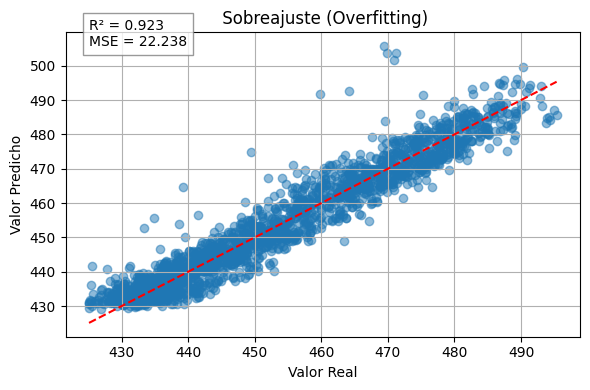

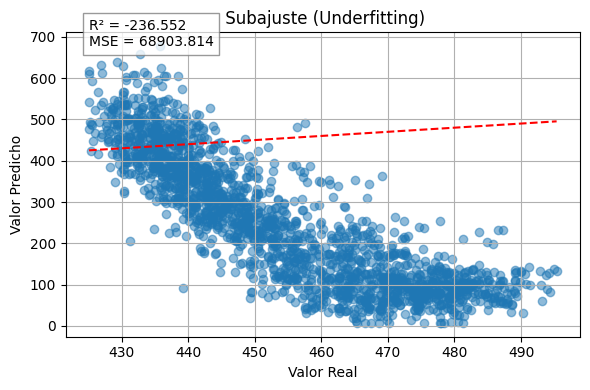

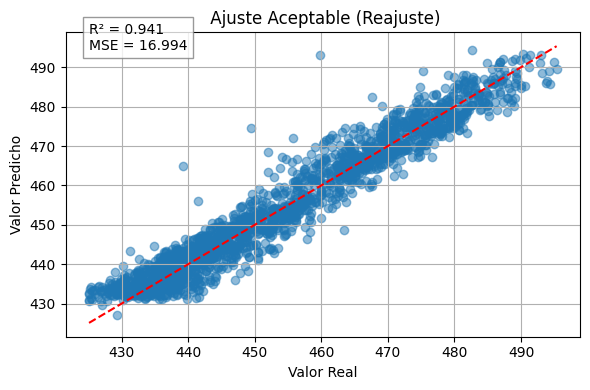

In [ ]:
plot_real_vs_pred(y_test, y_pred_sobreajuste, " Sobreajuste (Overfitting)")
plot_real_vs_pred(y_test, y_pred_subajuste, " Subajuste (Underfitting)")
plot_real_vs_pred(y_test, y_pred_reajuste, " Ajuste Aceptable (Reajuste)")



### Conclusi√≥n

A lo largo de este trabajo prob√© distintos modelos MLP para entender c√≥mo se comportan seg√∫n su configuraci√≥n. Lo que aprend√≠ fue que los hiperpar√°metros como las capas ocultas, la regularizaci√≥n (`alpha`) y la cantidad de iteraciones (`max_iter`) tienen un impacto muy fuerte en el resultado.

- En el **caso de sobreajuste**, el modelo era muy complejo (muchas capas y sin regularizaci√≥n). Aprendi√≥ demasiado bien los datos de entrenamiento, pero no funcion√≥ tan bien con datos nuevos. Es como si hubiera "memorizado" en vez de "entender".

- En el **caso de subajuste**, el modelo era demasiado simple y no tuvo tiempo suficiente para aprender. Como resultado, no predijo bien ni en entrenamiento ni en testeo.

- En el **caso del ajuste aceptable**, se us√≥ una configuraci√≥n equilibrada, y los resultados fueron buenos tanto en entrenamiento como en testeo. Este es el comportamiento que se busca: un modelo que entienda el patr√≥n general, sin memorizar ni quedarse corto.

En resumen, entend√≠ que no se trata solo de entrenar un modelo, sino de encontrar el equilibrio justo para que aprenda bien y generalice mejor.
